In [3]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
import cv2
from skimage.io import imsave, imread, imshow
from PIL import Image
import os

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.metrics import MeanIoU, Accuracy

In [4]:
# Reading images in the dataset
x_train = glob.glob("/kaggle/input/massachusetts-roads-dataset/tiff/train/*.tiff")
x_train = x_train[:400]
y_train = glob.glob("/kaggle/input/massachusetts-roads-dataset/tiff/train_labels/*.tif")
y_train = y_train[:400]

x_val = glob.glob("/kaggle/input/massachusetts-roads-dataset/tiff/val/*.tiff")
y_val = glob.glob("/kaggle/input/massachusetts-roads-dataset/tiff/val_labels/*.tif")

x_test = glob.glob("/kaggle/input/massachusetts-roads-dataset/tiff/test/*.tiff")
y_test = glob.glob("/kaggle/input/massachusetts-roads-dataset/tiff/test_labels/*.tif")

In [5]:
#Resizing x_train
dim = (512, 512) #(w,h)
x_train_resized = np.zeros((400,512,512,3))
for index,image in enumerate(x_train):
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = tiff.imread(image)
  x_train_resized[index] = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)

Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/17428735_15.tiff with Index : 0
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/23578780_15.tiff with Index : 1
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/24178540_15.tiff with Index : 2
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/12178705_15.tiff with Index : 3
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/23278960_15.tiff with Index : 4
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/20278930_15.tiff with Index : 5
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/20578900_15.tiff with Index : 6
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/12628810_15.tiff with Index : 7
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/22528990_15.tiff with Index : 8
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train/21629065_15.tiff with 

In [6]:
#Resizing y_train
dim = (512, 512) #(w,h)
y_train_resized = np.zeros((400,512,512))
for index,image in enumerate(y_train):
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = tiff.imread(image)
  y_train_resized[index] = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)

Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/24778855_15.tif with Index : 0
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/24928900_15.tif with Index : 1
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/10828825_15.tif with Index : 2
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/21778960_15.tif with Index : 3
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/25979290_15.tif with Index : 4
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/26129260_15.tif with Index : 5
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/23729005_15.tif with Index : 6
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/17278765_15.tif with Index : 7
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/train_labels/20129005_15.tif with Index : 8
Reading Image : /kaggle/input/massach

In [7]:
#Resizing x_test
dim = (512, 512) #(w,h)
x_test_resized = np.zeros((49,512,512,3))
for index,image in enumerate(x_test):
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = tiff.imread(image)
  x_test_resized[index] = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)

Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/11278840_15.tiff with Index : 0
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/18328735_15.tiff with Index : 1
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/24628885_15.tiff with Index : 2
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/23878540_15.tiff with Index : 3
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/22528885_15.tiff with Index : 4
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/22078975_15.tiff with Index : 5
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/10378780_15.tiff with Index : 6
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/24479170_15.tiff with Index : 7
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/21779005_15.tiff with Index : 8
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test/17878735_15.tiff with Index : 9


In [8]:
#Resizing y_test
dim = (512, 512) #(w,h)
y_test_resized = np.zeros((49,512,512))
for index,image in enumerate(y_test):
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = tiff.imread(image)
  y_test_resized[index] = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)

Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/26578720_15.tif with Index : 0
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/23278930_15.tif with Index : 1
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/10378780_15.tif with Index : 2
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/22078975_15.tif with Index : 3
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/11278840_15.tif with Index : 4
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/23429080_15.tif with Index : 5
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/23878540_15.tif with Index : 6
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/26278720_15.tif with Index : 7
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/test_labels/10828720_15.tif with Index : 8
Reading Image : /kaggle/input/massachusetts-ro

In [9]:
#Resizing x_val
dim = (512, 512) #(w,h)
x_val_resized = np.zeros((14,512,512,3))
for index,image in enumerate(x_val):
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = tiff.imread(image)
  x_val_resized[index] = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)

Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/21929020_15.tiff with Index : 0
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/10978735_15.tiff with Index : 1
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/24328810_15.tiff with Index : 2
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/23128930_15.tiff with Index : 3
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/22829035_15.tiff with Index : 4
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/25229230_15.tiff with Index : 5
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/24929245_15.tiff with Index : 6
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/24179245_15.tiff with Index : 7
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/18028945_15.tiff with Index : 8
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val/22978990_15.tiff with Index : 9
Reading Im

In [10]:
#Resizing y_val
dim = (512, 512) #(w,h)
y_val_resized = np.zeros((14,512,512))
for index,image in enumerate(y_val):
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = tiff.imread(image)
  y_val_resized[index] = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)

Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/10978735_15.tif with Index : 0
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/10228690_15.tif with Index : 1
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/24328810_15.tif with Index : 2
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/22528900_15.tif with Index : 3
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/25229230_15.tif with Index : 4
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/10978795_15.tif with Index : 5
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/25229245_15.tif with Index : 6
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/22978990_15.tif with Index : 7
Reading Image : /kaggle/input/massachusetts-roads-dataset/tiff/val_labels/18028945_15.tif with Index : 8
Reading Image : /kaggle/input/massachusetts-roads-datas

(512, 512, 3)


(<Figure size 988.8x604.8 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x78e030dc3c70>)

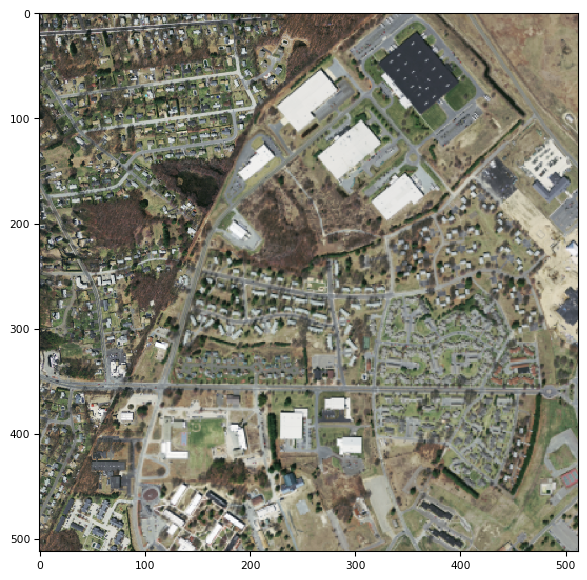

In [131]:
print(x_test_resized[0].shape)
tiff.imshow(x_test_resized[0])

(512, 512)


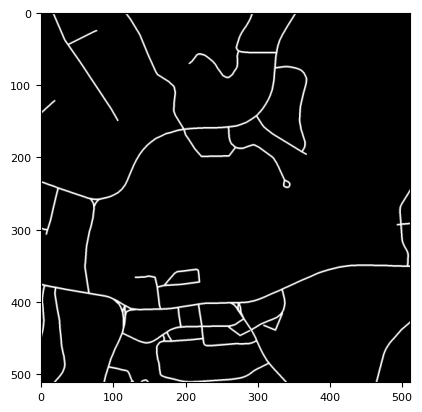

In [132]:
print(y_test_resized[0].shape)
plt.imshow(y_test_resized[0],cmap='gray')

(1500, 1500)


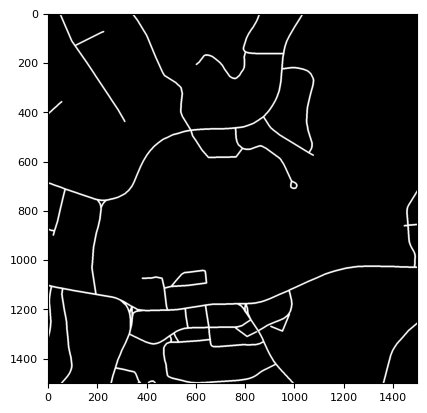

In [133]:
x = tiff.imread(y_test[0])
print(x.shape)
plt.imshow(x,cmap='gray')

In [11]:
def get_dataset(x_dir, y_dir):
    num_samples = len(x_dir)
    x=[]
    y=[]
    
    for i in range(num_samples):
        x.append(x_dir[i])
        (thresh, im_bw) = cv2.threshold(y_dir[i], 128, 1, cv2.THRESH_BINARY)
        y.append(im_bw)
        
    y = np.reshape(y, (-1,512,512,1))
    return np.array(x),np.array(y)

In [12]:
x_train, y_train = get_dataset(x_train_resized, y_train_resized)
x_val, y_val = get_dataset(x_val_resized, y_val_resized)
x_test, y_test = get_dataset(x_test_resized, y_test_resized)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(400, 512, 512, 3) (400, 512, 512, 1) (14, 512, 512, 3) (14, 512, 512, 1) (49, 512, 512, 3) (49, 512, 512, 1)


In [13]:
IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

# Encode module
c1 = Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same') (inputs)
c1 = Activation('relu')(c1)
c1 = Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same') (c1)
c1 = Activation('relu')(c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.4) (c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)

# Decoder module
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)
outputs = Conv2D(1, (1, 1)) (c9)
out = Activation('sigmoid')(outputs)

model = Model(inputs=[inputs], outputs=[out])

In [14]:
# define loss function
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 16)         448       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 512, 512, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 16)         2320      ['activation[0][0]']          
                                                                                              

In [15]:
model_checkpoint = ModelCheckpoint('/kaggle/working/road_unet1.h5', monitor='val_loss', save_best_only=True) 
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=10, batch_size=4, verbose=1, callbacks=[model_checkpoint,callback])

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 12.9725 - accuracy: 0.7462

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 629s 6s/step - loss: 12.9725 - accuracy: 0.7462 - val_loss: 2.7039 - val_accuracy: 0.8795
Epoch 2/10
100/100 [==============================] - 660s 7s/step - loss: 1.8702 - accuracy: 0.9026 - val_loss: 2.1383 - val_accuracy: 0.8852
Epoch 3/10
100/100 [==============================] - 621s 6s/step - loss: 1.3501 - accuracy: 0.9059 - val_loss: 1.8275 - val_accuracy: 0.8940
Epoch 4/10
100/100 [==============================] - 580s 6s/step - loss: 1.1146 - accuracy: 0.9108 - val_loss: 1.5827 - val_accuracy: 0.8974
Epoch 5/10
100/100 [==============================] - 604s 6s/step - loss: 0.9571 - accuracy: 0.9151 - val_loss: 1.3778 - val_accuracy: 0.8848
Epoch 6/10
100/100 [==============================] - 577s 6s/step - loss: 0.8639 - accuracy: 0.9151 - val_loss: 1.2493 - val_accuracy: 0.8955
Epoch 7/10
100/100 [==============================] - 579s 6s/step - loss: 0.7698 - accuracy: 0.9172 - val_loss: 1.1074 - val_accuracy: 0.8824
Epoch 8/1

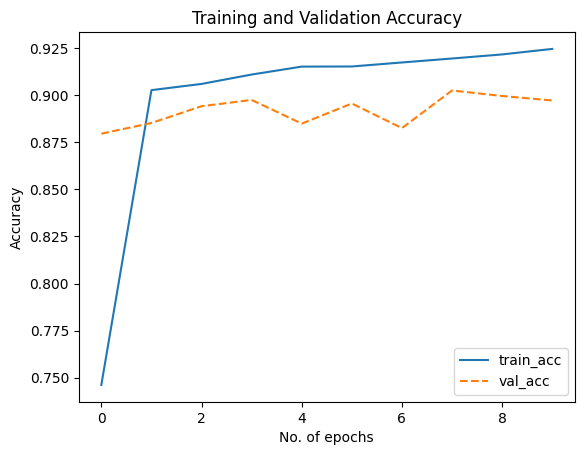

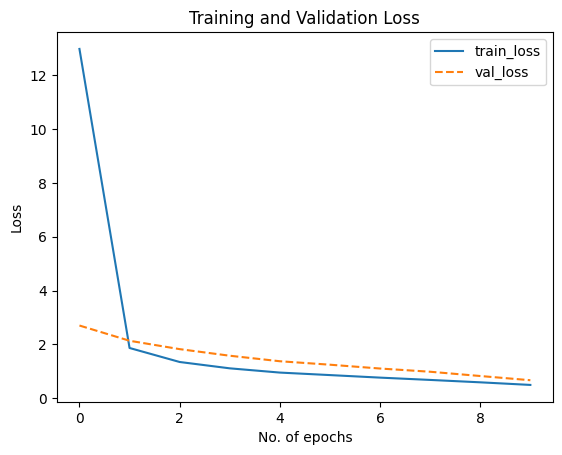

In [16]:
plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] ,'--', label = 'val_acc')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] ,'--', label = 'val_loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

In [17]:
y_pred = model.predict(x_test)

2/2 [==============================] - 19s 7s/step


In [19]:
y_pred = y_pred>0.5

Text(0.5, 1.0, 'Predicted image')

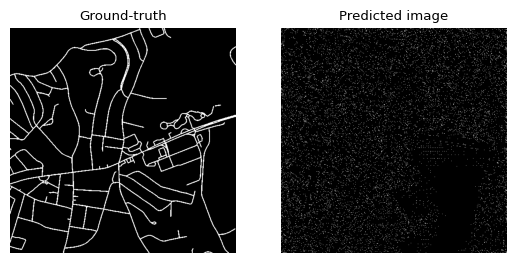

In [42]:
plt.subplot(1,2,1)
plt.imshow(np.reshape(y_test[23],(512,512)),cmap="gray")
plt.axis('off')
plt.title("Ground-truth")

plt.subplot(1,2,2)
plt.imshow(np.reshape(y_pred[23],(512,512)),cmap='gray')
plt.axis('off')
plt.title("Predicted image")

# tiff.imshow(x_test_resized[23])
# plt.axis('off')
# plt.title("Original image")

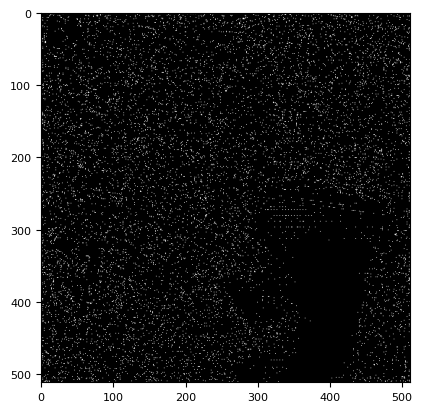

In [37]:
plt.imshow(np.reshape(y_pred[23],(512,512)),cmap='gray')

In [28]:
meaniou = MeanIoU(2, name=None, dtype=None)
meaniou.update_state(y_test, y_pred)
print("mean IoU = ",meaniou.result().numpy())
meaniou.reset_states()
 
acc = Accuracy()
acc.update_state(y_test, y_pred)
print("acc = ",acc.result().numpy())
acc.reset_states()
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.ravel(), y_pred.ravel())
print(cm)
 
from sklearn.metrics import classification_report
cr = classification_report(y_test.ravel(), y_pred.ravel())
print(cr)
 
from sklearn.metrics import cohen_kappa_score
k = cohen_kappa_score(y_test.ravel(), y_pred.ravel())
print("k = ",k)
 
def get_dice(y_true, y_pred):
 
    intersection = np.sum(y_true * y_pred, axis=(0, 1, 2))
    union = np.sum(y_true**2, axis=(0, 1, 2)) + np.sum(y_pred**2, axis=(0, 1, 2))
    dc = 2 * intersection / union
    return dc
 
dice_coeff = get_dice(y_test, y_pred)
print("dc = ",np.mean(dice_coeff))

mean IoU =  0.47060615
acc =  0.92006993
[[11796025   446374]
 [  580332    22325]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96  12242399
         1.0       0.05      0.04      0.04    602657

    accuracy                           0.92  12845056
   macro avg       0.50      0.50      0.50  12845056
weighted avg       0.91      0.92      0.92  12845056

k =  0.0006518512196164172
dc =  0.04167615619831316
